In [35]:
import utils
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.integrate as integrate

In [13]:
with open("/home/pavnet/processing2/dataprocessingv2/code/tests/24kgen/PLO_2025_06_02_21_38_00h393574__19429.txt", "rb") as f:
    ss0 = utils.read_binary_IQ(f)
    

In [14]:
!ls /home/pavnet/processing2/dataprocessingv2/code/tests/24kgen/


PLO_2025_06_02_21_38_00h393574__19429.txt
PLO_2025_06_02_21_38_01h393542__19430.txt
PLO_2025_06_02_21_38_02h393553__19431.txt
PLO_2025_06_02_21_38_03h393552__19432.txt
PLO_2025_06_02_21_38_04h393564__19433.txt


In [16]:
st = ss0[0,:] + 1j*ss0[1,:]

In [15]:
import fft_pavnet

In [23]:
fft_npts = 8192
freq_arr = np.arange(fft_npts)*100000/fft_npts
ftx_indexrange = []
bw = 150
vlf_transmitters= {
            "NPM":21.4e3, 
            "NAA":24.0e3, 
            "NLK":24.8e3, 
            "NLM":25.2e3,
            "NAU":40.75e3
            }       
bw=100
for call, f in vlf_transmitters.items():
    i = np.argmin(abs(freq_arr-f))
    id_0 = np.argmin(abs(freq_arr-(f-bw/2)))
    id_f = np.argmin(abs(freq_arr-(f+bw/2)))
    ftx_indexrange.append([id_0, id_f])
        

In [26]:
X  =fft_pavnet.fft_overlap(st,fft_npts=fft_npts)

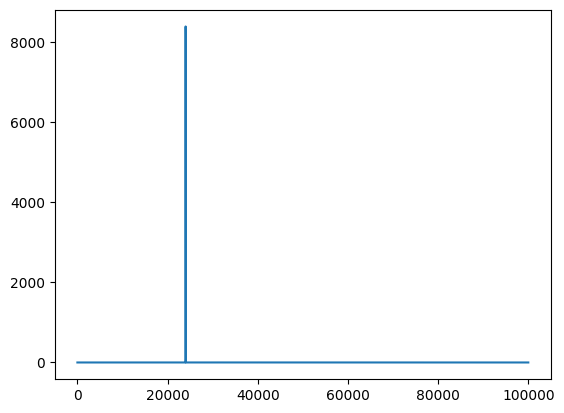

In [41]:

plt.plot(freq_arr, X)
#plt.ylim(0,4)

In [5]:
with open(".//PLO_2025_06_02_21_38_00h393574__19429.txt", "rb") as f:
    ss = utils.read_binary_IQ(f)

FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/temprpdata/PLO_2025_06_02_21_38_00h393574__19429.txt'

In [50]:
sampling_freq=100e3
hpf = signal.firwin(51, cutoff=12e3, window="hamming", fs=sampling_freq, pass_zero=False)
hpf = signal.firwin(51, cutoff=12e3, window="hamming", fs=sampling_freq, pass_zero="highpass")

iq = signal.filtfilt(hpf, 1,ss0[0,:]) +1j*signal.filtfilt(hpf, 1, ss0[1,:])
                
# local universal time : localt +5h
#t = utils.get_dt_fname_v3(str(f)) + datetime.timedelta(hours=self.TOFFSET))
#print("\napplying FFT {}".format(method))
#S = self.fft_method(iq) #fft_pavnet.fft_window(st, wlen=fft_npts,fw=signal.windows.flattop)
S  =fft_pavnet.fft_overlap(iq,fft_npts=fft_npts)
amplitudes = {f"{tx}":[] for tx in vlf_transmitters.keys()}
#print(amplitudes)
#amplitudes = {}
for k, (tx_call, tx_f) in enumerate(vlf_transmitters.items()):
    id_0, id_f = ftx_indexrange[k]
    wf = freq_arr[id_0:id_f]
    amp_ = integrate.simpson(S[id_0:id_f], wf)/(wf[-1]-wf[0])
    #amp_2 = max(S[id_0:id_f])
    #print(amp_, type(amp_))
    amplitudes[tx_call].append(amp_)


(23000.0, 25000.0)

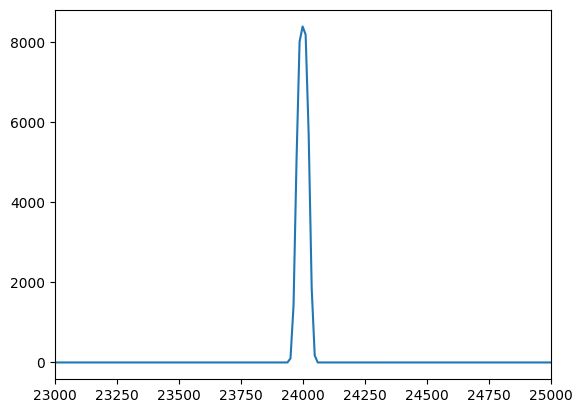

In [53]:
plt.plot(freq_arr, S)
plt.xlim(23e3, 25e3)

In [16]:
ss0

array([[ 3.3673966,  3.106    , -3.7741349, ...,  3.5671294, -3.3682766,
        -3.1541054],
       [ 3.350085 , -3.5619476, -2.8781466, ..., -3.1537266, -3.3559237,
         3.5684924]], dtype=float32)

In [18]:
 t = utils.get_dt_fname_v3("PLO_2025_06_02_16_26_01h377556__710.txt")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [19]:
t

datetime.datetime(2025, 6, 2, 16, 26, 1)

In [20]:
__file__

NameError: name '__file__' is not defined

In [21]:
import os


In [22]:
os.pwd()

AttributeError: module 'os' has no attribute 'pwd'

In [23]:
os.getcwd()

'/home/pavnet/processing2/dataprocessingv2/code'

In [4]:
! cp /run/user/1000/temprpdata/* ./tests/24kgen/

In [1]:
ls

 antar_unzip_targz.py                   'lastspectrum_2025-05-26 20:42:00.csv'
 config_params.json                     'lastspectrum_2025-05-26 20:42:25.csv'
 fft_pavnet.py                          'lastspectrum_2025-05-26 21:02:28.csv'
 fixingplt.py                           'lastspectrum_2025-06-02 16:15:03.csv'
'lastbuffer_2025-05-22 17:51:06.csv'     narrowband.py
'lastbuffer_2025-05-22 18:10:27.csv'     processing_amplitudes.py
'lastbuffer_2025-05-22 18:16:27.csv'     __pycache__/
'lastbuffer_2025-05-22 19:08:50.csv'     reception.py
'lastbuffer_2025-05-26 20:42:00.csv'     station.py
'lastbuffer_2025-05-26 20:42:25.csv'     tests/
'lastbuffer_2025-05-26 21:02:28.csv'     tools.py
'lastbuffer_2025-06-02 16:15:03.csv'     Untitled.ipynb
'lastspectrum_2025-05-22 18:10:27.csv'   uploader.py
'lastspectrum_2025-05-22 18:16:27.csv'   utils.py
'lastspectrum_2025-05-22 19:08:50.csv'
